In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

C:\Users\mhme2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\mhme2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\mhme2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train_data = datasets.FashionMNIST(root="data" , train=True , download=True , transform=ToTensor())
test_data = datasets.FashionMNIST(root="data" , train=False , download=True , transform=ToTensor())

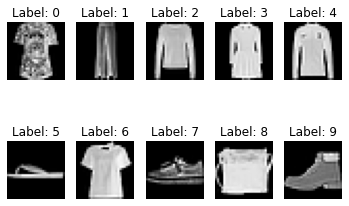

In [3]:
idx=np.random.randint(0,60000)
for label in range(10):
    plt.subplot(2,5,label+1)
    while train_data.targets[idx] != label:
        idx=np.random.randint(0,60000)
    plt.imshow(train_data.data[idx],cmap='gray')
    plt.title("Label: "+str(train_data[idx][1]))
    plt.axis('off')
plt.show()

In [4]:
def softmax(x: torch.Tensor) -> torch.Tensor:
    return torch.exp(x) / torch.exp(x).sum(dim=1, keepdim=True)
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.max(x, torch.zeros_like(x))
def cross_entropy_loss(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    return -torch.log(y_hat[range(len(y_hat)), y])

In [5]:
train_data_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_data_loader=DataLoader(test_data,shuffle=True)
w1=torch.randn(784,30)/100    #weights of first layer
b1=torch.randn(30)/100        #bias of first layer
w2=torch.randn(30,25)/100     #weights of second layer
b2=torch.randn(25)/100        #bias of second layer
w3=torch.randn(25,10)/100     #weights of third layer
b3=torch.randn(10)/100        #bias of third layer

#activating gradient tracking for weights and biases

w1.requires_grad=True
w2.requires_grad=True
w3.requires_grad=True
b1.requires_grad=True
b2.requires_grad=True
b3.requires_grad=True
learning_rate=0.001
epochs=15

In [6]:
def model(x:torch.tensor):
    x=x.reshape(-1,784)
    l1=relu(torch.matmul(x,w1)+b1)
    l2=relu(torch.matmul(l1,w2)+b2)
    l3=softmax(torch.matmul(l2,w3)+b3)
    return l3

In [7]:
def train_loop(dataloader,model,loss_fn):
    global w1,b1,w2,b2,w3,b3
    
    for batch,(X,Y) in enumerate(train_data_loader):
        X=X.squeeze()
        loss=loss_fn(model(X),Y).sum()  #summation of loss of all the images in the batch
        loss.backward()                 # calculating gradients of loss with respect to weights and biases
        
        #updating weights and biases
        with torch.no_grad():
            w1-=learning_rate*w1.grad
            b1-=learning_rate*b1.grad
            w2-=learning_rate*w2.grad
            b2-=learning_rate*b2.grad
            w3-=learning_rate*w3.grad
            b3-=learning_rate*b3.grad
        if batch%100==0:
            print("loss=",(loss/len(X)).item())
        #put gradients equal to zero
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
        w3.grad.zero_()
        b3.grad.zero_()
        


In [8]:
def test_loop(dataloader,model):
    correct=0                       #number of correct predictions
    total=0                         #total number of predictions
    with torch.no_grad():
        for X,Y in dataloader:
            X=X.squeeze()
            pred=model(X)
            pred=torch.argmax(pred,dim=1)
            correct+=(pred==Y).sum()
            total+=len(Y)
    print("accuracy=",correct/total)

In [9]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_data_loader,model,cross_entropy_loss)
    test_loop(test_data_loader,model)
    print("Done!")

Epoch 1
-------------------------------
loss= 2.302903175354004
loss= 2.3074185848236084
loss= 2.3041417598724365
loss= 2.3018929958343506
loss= 2.2954912185668945
loss= 2.118899345397949
loss= 1.5577861070632935
loss= 1.2613774538040161
loss= 1.0140657424926758
loss= 0.8625017404556274
accuracy= tensor(0.6680)
Done!
Epoch 2
-------------------------------
loss= 0.8867773413658142
loss= 0.8513596653938293
loss= 1.0842666625976562
loss= 0.782461941242218
loss= 0.8417670726776123
loss= 0.6898108124732971
loss= 1.1653306484222412
loss= 0.8186057209968567
loss= 0.4899727702140808
loss= 0.5389376878738403
accuracy= tensor(0.7720)
Done!
Epoch 3
-------------------------------
loss= 0.6613729596138
loss= 0.6852864623069763
loss= 0.8484699726104736
loss= 0.5898393988609314
loss= 0.4833141267299652
loss= 0.4870849847793579
loss= 0.5471013188362122
loss= 0.581530749797821
loss= 0.7382972240447998
loss= 0.43031585216522217
accuracy= tensor(0.8019)
Done!
Epoch 4
-------------------------------
los

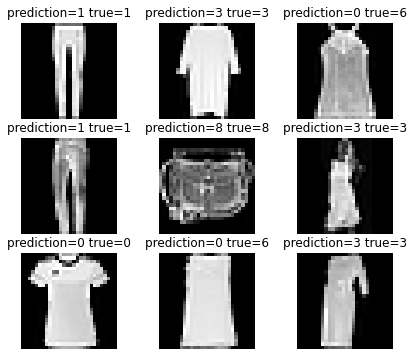

In [10]:
idx=np.random.randint(0,10000,9)
plt.figure(figsize=(7,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data.data[idx[i]],cmap='gray')
    pred_label=torch.argmax(model(test_data[idx[i]][0].squeeze())).item()
    plt.title("prediction="+str(pred_label)+" true="+str(test_data[idx[i]][1]))
    plt.axis('off')
plt.show()